## Hypothesis
To predict the incentive level requested for raising thermostat settings for 2-3F 
    when being at home in summer.
    
IV: EnergyC, MC, ComfNS, HabitC

### Filter: HomeSYN=1 (i.e., only use people who use A/C when being at home in summer)


In [334]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;
survey$IncHomeS[survey$IncHomeS==999] = NA;

#table(survey$HomeS)
survey <- survey[survey$HomeS>60,];
survey <- survey[survey$HomeS<80,];
#table(survey$HomeS)

#table(survey$HomeW)
survey <- survey[survey$HomeW>60,];
survey <- survey[survey$HomeW<80,];
#table(survey$HomeW)

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Trust",
    "MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];

sort(names(survey))
sort(names(data1))

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "Attitude"    "AwayS"       "AwaySNY"    
 [11] "AwayW"       "AwayWNY"     "BillS"       "BillW"       "CashYN"     
 [16] "City"        "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [21] "ComfNW"      "ComfNW1"     "ComfNW2"     "ComfortS"    "ComfortW"   
 [26] "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [31] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "DeviceType" 
 [36] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [41] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"      "Frugal1"    
 [46] "Frugal2"     "Frugal3"     "Gender"      "HTdevice"    "HTsource"   
 [51] "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [56] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [61] "HabitE3"     "HabitG"      "HeatYN"      "HomeS"       "HomeSYN"    
 [66] "HomeW"       "HomeWYN"     "HouseholdS"  "ID"          "INT1"       
 [71] "INT2"        "INT3"        "INT4"        "IncAutoS"    "IncAutoW"   
 [76] "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W" 
 [81] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"      
 [86] "Income"      "Job"         "Latitude"    "Longitude"   "MC"         
 [91] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [96] "MCBill"      "MCG"         "NBillS"      "NBillW"      "OwnRent"    
[101] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
[106] "PBC5"        "PBillStatus" "Political"   "ReasonNeg"   "ReasonPos"  
[111] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
[116] "SN4"         "Sqft"        "SqftCate"    "State"       "SubN"       
[121] "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg" 
[126] "Summer_avgC" "Summer_avgF" "Trust"       "Trust1"      "Trust2"     
[131] "Trust3"      "Trust4"      "Utility"     "Winter_avg"  "Winter_avgC"
[136] "Winter_avgF" "X"           "X.9to5"      "cold"        "hot"        
[141] "valid"       "valid1"      "valid2"

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "AwayW"       "BillS"      
 [11] "BillW"       "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"    
 [16] "ComfNS3"     "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"  
 [21] "ControlN2R"  "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"     
 [26] "ConvB3"      "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"    
 [31] "EnergyC1"    "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"     
 [36] "Frugal1"     "Frugal2"     "Frugal3"     "Gender"      "HabitC"     
 [41] "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"    
 [46] "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"    
 [51] "HabitG"      "HomeS"       "HomeW"       "HouseholdS"  "INT1"       
 [56] "INT2"        "INT3"        "INT4"        "IncAutoS"    "IncAutoW"   
 [61] "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W" 
 [66] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"      
 [71] "Income"      "Latitude"    "MC"          "MC1"         "MC2"        
 [76] "MC3"         "MC4"         "MC5"         "OwnRent"     "PBC"        
 [81] "PBC1"        "PBC2"        "PBC3R"       "PBC4"        "PBC5"       
 [86] "Political"   "RewardForm"  "SN"          "SN1"         "SN2"        
 [91] "SN3"         "SN4"         "Sqft"        "SqftCate"    "State"      
 [96] "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg" 
[101] "Summer_avgC" "Summer_avgF" "Trust1"      "Trust2"      "Trust3"     
[106] "Trust4"      "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

In [335]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "X.9to5" "191"   
[1] "HomeW" "191"  
[1] "HomeS" "191"  
[1] "AwayW" "236"  
[1] "AwayS" "257"  
[1] "IncHomeS" "195"     
[1] "IncHomeW" "191"     
[1] "RewardForm" "191"       
[1] "IncAwayS" "191"     
[1] "IncAwayW" "191"     
[1] "IncWD" "231"  
[1] "IncDish" "324"    
[1] "IncAutoS" "191"     
[1] "IncAutoW" "191"     
[1] "IncEmer10S" "191"       
[1] "IncEmer30S" "191"       
[1] "IncEmer10W" "191"       
[1] "IncEmer30W" "191"       
[1] "EmerRForm" "191"      
[1] "EnergyC1" "191"     
[1] "EnergyC2" "191"     
[1] "EnergyC3" "191"     
[1] "EnergyC4" "191"     
[1] "MC1" "191"
[1] "MC2" "191"
[1] "MC3" "191"
[1] "MC4" "191"
[1] "MC5" "191"
[1] "Frugal1" "191"    
[1] "Frugal2" "191"    
[1] "Frugal3" "191"    
[1] "Trust1" "191"   
[1] "Trust2" "191"   
[1] "Trust3" "191"   
[1] "Trust4" "191"   
[1] "ComfNS1" "191"    
[1] "ComfNS2" "191"    
[1] "ComfNS3" "191"    
[1] "ComfNW1" "191"    
[1] "ComfNW2" "191"    
[1] "ConvB1" "191"   
[1] "ConvB2" "191"   
[1] "ConvB3"

In [336]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 732 105
[1] 490 105


In [337]:
#names(data2)
#These are only variables we really care about
IVS = c(
"Age",
"Atti",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"Attitude",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"HomeS",
"State",
"Summer_avgF",
"CashYN")

In [338]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "BillS"       "BillW"       "CashYN"     
 [11] "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"     
 [16] "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"  
 [21] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [26] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [31] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"    
 [36] "Frugal3"     "Gender"      "HabitC"      "HabitC1"     "HabitC2"    
 [41] "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"    
 [46] "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"      "HomeS"      
 [51] "HouseholdS"  "INT1"        "INT2"        "INT3"        "INT4"       
 [56] "IncAutoS"    "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncEmer10S" 
 [61] "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"   
 [66] "Income"      "Latitude"    "MC"          "MC1"         "MC2"        
 [71] "MC3"         "MC4"         "MC5"         "OwnRent"     "PBC"        
 [76] "PBC1"        "PBC2"        "PBC3R"       "PBC4"        "PBC5"       
 [81] "Political"   "RewardForm"  "SN"          "SN1"         "SN2"        
 [86] "SN3"         "SN4"         "Sqft"        "SqftCate"    "State"      
 [91] "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg" 
 [96] "Summer_avgC" "Summer_avgF" "Trust1"      "Trust2"      "Trust3"     
[101] "Trust4"      "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

[1] "Age"         "Atti"        "Attitude"    "CashYN"      "ComfNS"     
 [6] "Educ"        "EnergyC"     "Ethnic"      "Frugal"      "Gender"     
[11] "HabitC"      "HabitG"      "HomeS"       "HouseholdS"  "Income"     
[16] "Latitude"    "MC"          "OwnRent"     "PBC"         "Political"  
[21] "SN"          "SqftCate"    "State"       "SubNorm"     "Summer_avgF"
[26] "Trust"

In [339]:
data1 <- data2[, which(names(data2) %in% c("IncHomeS",IVS))];
sort(names(data1))

[1] "Age"         "Atti"        "Attitude"    "CashYN"      "ComfNS"     
 [6] "Educ"        "EnergyC"     "Ethnic"      "Gender"      "HabitC"     
[11] "HabitG"      "HomeS"       "HouseholdS"  "IncHomeS"    "Income"     
[16] "Latitude"    "MC"          "OwnRent"     "PBC"         "Political"  
[21] "SN"          "SqftCate"    "State"       "SubNorm"     "Summer_avgF"

In [340]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [341]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [342]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "HomeS"       "IncHomeS"    "State"       "Age"         "Gender"     
 [6] "OwnRent"     "SqftCate"    "HouseholdS"  "Political"   "Ethnic"     
[11] "Income"      "Educ"        "Latitude"    "EnergyC"     "Attitude"   
[16] "PBC"         "CashYN"      "MC"          "ComfNS"      "Atti"       
[21] "SubNorm"     "SN"          "HabitG"      "HabitC"      "Summer_avgF"

In [343]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [344]:
hiCor(data2,.7)

,Latitude,Attitude,Atti,Summer_avgF
Latitude,1.000,-0.097,-0.097,-0.83
Attitude,-0.097,1.000,1.000,0.10
Atti,-0.097,1.000,1.000,0.10
Summer_avgF,-0.830,0.100,0.100,1.00


In [345]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:20];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:20){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.15
    EnergyC Attitude    MC  Atti SubNorm HabitG HabitC
PC1   -0.36    -0.45 -0.29 -0.45    -0.3  -0.24   -0.2
[1] 0.25
    HomeS   Age OwnRent SqftCate HouseholdS Income
PC2 -0.29 -0.34   -0.47    -0.49      -0.23  -0.37
[1] 0.33
    Latitude ComfNS Summer_avgF
PC3    -0.57   0.22        0.59
[1] 0.39
    HomeS Gender HouseholdS Ethnic  Educ HabitC
PC4 -0.29   0.25       0.48  -0.27 -0.35  -0.39
[1] 0.44
    State HouseholdS Political Ethnic Income Educ   PBC ComfNS HabitG
PC5  -0.2      -0.23      0.43  -0.28   0.25 0.41 -0.28  -0.28  -0.33
[1] 0.5
    IncHomeS  Age HouseholdS CashYN ComfNS
PC6     0.49 0.39      -0.28   0.36   0.41
[1] 0.54
    IncHomeS Gender Political Income   PBC CashYN    MC SubNorm   SN
PC7     0.27   0.39      0.28  -0.26 -0.27  -0.44 -0.24    0.24 0.27
[1] 0.58
     Age Gender Income ComfNS SubNorm   SN
PC8 -0.3  -0.34   0.23   0.24    0.32 0.58
[1] 0.62
    HomeS IncHomeS State Ethnic ComfNS HabitG
PC9 -0.24     0.36  0.59  -0.44  -0.28   0.33
[1] 0.

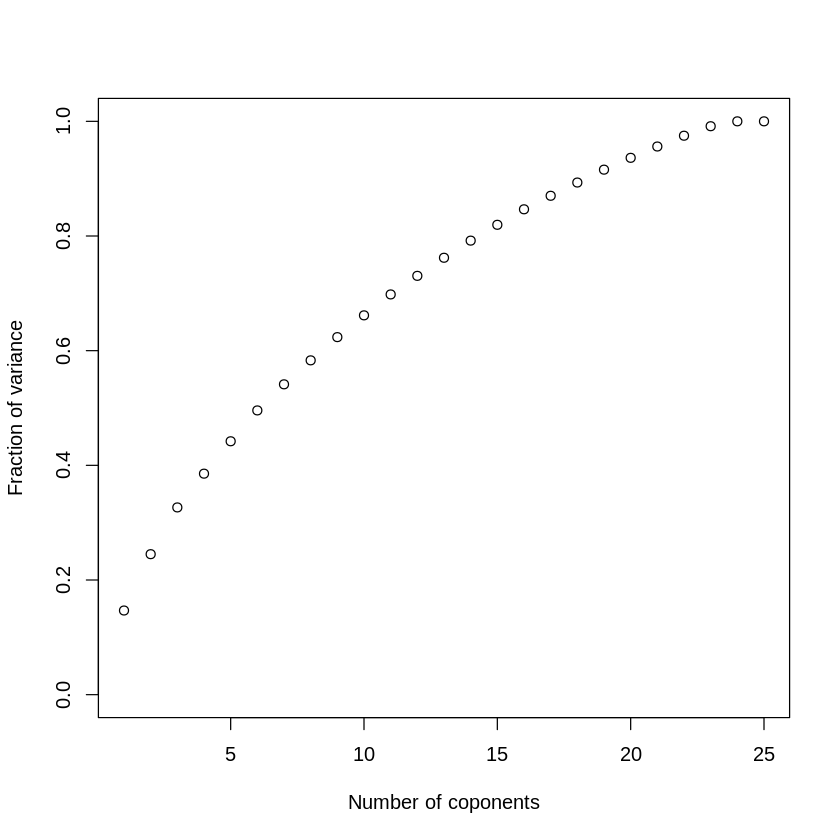

In [346]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [347]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

Warning message in summary.lm(lm(fmla, data = data2)):
"essentially perfect fit: summary may be unreliable"Warning message in summary.lm(lm(fmla, data = data2)):
"essentially perfect fit: summary may be unreliable"

In [348]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Summer_avgF,25,0.62
Latitude,13,0.61
SqftCate,7,0.42
EnergyC,14,0.39
OwnRent,6,0.36
Income,11,0.29
SubNorm,21,0.27
HouseholdS,8,0.26
MC,18,0.25
Age,4,0.24
HabitG,23,0.21


In [349]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)

ERROR: Error in solve.default(cv): system is computationally singular: reciprocal condition number = 9.89183e-18


In [350]:
#Age, Income, Educ, OwnRent, SqftCate, EnergyC, MC, ComfNS, HabitC, Attitude, PBC, SubNorm

IndepPred = c('Age', 'Income', 'Educ', 'OwnRent', 'SqftCate', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'PBC', 'SubNorm','Attitude')
fmla <- as.formula(paste("IncHomeS",paste(IndepPred,collapse="+"),sep="~"));

In [351]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.908 -1.092 -0.184  0.930  4.549 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.23509    0.77635    4.17  3.7e-05 ***
Age          0.02388    0.00744    3.21   0.0014 ** 
Income      -0.01372    0.04459   -0.31   0.7585    
Educ         0.02380    0.07308    0.33   0.7448    
OwnRent      0.19019    0.18165    1.05   0.2956    
SqftCate    -0.02257    0.08229   -0.27   0.7840    
EnergyC     -0.03199    0.06743   -0.47   0.6354    
MC          -0.00911    0.07835   -0.12   0.9075    
ComfNS       0.30752    0.05571    5.52  5.6e-08 ***
HabitC      -0.06847    0.05909   -1.16   0.2471    
PBC         -0.09944    0.08671   -1.15   0.2520    
SubNorm      0.03994    0.06349    0.63   0.5295    
Attitude    -0.13684    0.09130   -1.50   0.1346    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 477 degrees of free

In [352]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,5.3e+01,52.922,18.877,1.7e-05
Income,1,8.0e-02,0.080,0.028,8.7e-01
Educ,1,1.8e+00,1.844,0.658,4.2e-01
OwnRent,1,1.5e+00,1.454,0.519,4.7e-01
SqftCate,1,1.7e-02,0.017,0.006,9.4e-01
EnergyC,1,1.7e+01,16.807,5.995,1.5e-02
MC,1,3.0e+00,2.993,1.068,3.0e-01
ComfNS,1,9.1e+01,91.298,32.565,2.0e-08
HabitC,1,5.6e+00,5.574,1.988,1.6e-01
PBC,1,5.2e+00,5.158,1.840,1.8e-01


In [353]:
mod = lm(fmla,data=data2,subs=data2$Summer_avgF>73)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avgF > 
    73)

Residuals:
   Min     1Q Median     3Q    Max 
-3.811 -1.101 -0.214  0.955  4.654 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.41589    0.94898    4.65  4.8e-06 ***
Age          0.02627    0.00976    2.69   0.0075 ** 
Income       0.02390    0.05433    0.44   0.6603    
Educ        -0.01857    0.09181   -0.20   0.8398    
OwnRent      0.03158    0.22642    0.14   0.8892    
SqftCate    -0.09719    0.10230   -0.95   0.3428    
EnergyC     -0.02278    0.08316   -0.27   0.7844    
MC          -0.00815    0.10149   -0.08   0.9361    
ComfNS       0.35308    0.07068    5.00  9.8e-07 ***
HabitC      -0.06848    0.07547   -0.91   0.3649    
PBC         -0.18842    0.10898   -1.73   0.0848 .  
SubNorm      0.01005    0.08146    0.12   0.9019    
Attitude    -0.21946    0.11759   -1.87   0.0629 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual stan

In [354]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,3.5e+01,3.5e+01,1.2e+01,5.7e-04
Income,1,3.5e-04,3.5e-04,1.2e-04,9.9e-01
Educ,1,3.9e+00,3.9e+00,1.4e+00,2.4e-01
OwnRent,1,1.1e+00,1.1e+00,3.8e-01,5.4e-01
SqftCate,1,8.3e-01,8.3e-01,2.9e-01,5.9e-01
EnergyC,1,2.2e+01,2.2e+01,7.6e+00,6.3e-03
MC,1,6.8e+00,6.8e+00,2.4e+00,1.3e-01
ComfNS,1,6.8e+01,6.8e+01,2.4e+01,1.9e-06
HabitC,1,6.1e+00,6.1e+00,2.1e+00,1.5e-01
PBC,1,1.1e+01,1.1e+01,3.9e+00,5.0e-02


In [355]:
#added CashYN to model
IndepPred = c('Age', 'Income', 'Educ', 'OwnRent', 'SqftCate', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'PBC', 'SubNorm','Attitude', 'CashYN')
fmla <- as.formula(paste("IncHomeS",paste(IndepPred,collapse="+"),sep="~"));

In [356]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.953 -1.097 -0.191  0.917  4.531 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.95893    0.79574    3.72  0.00022 ***
Age          0.02334    0.00744    3.14  0.00181 ** 
Income      -0.01700    0.04458   -0.38  0.70310    
Educ         0.01994    0.07302    0.27  0.78493    
OwnRent      0.20660    0.18170    1.14  0.25610    
SqftCate    -0.01601    0.08229   -0.19  0.84577    
EnergyC     -0.03023    0.06734   -0.45  0.65368    
MC          -0.01712    0.07841   -0.22  0.82722    
ComfNS       0.30457    0.05566    5.47  7.2e-08 ***
HabitC      -0.06008    0.05926   -1.01  0.31118    
PBC         -0.10425    0.08664   -1.20  0.22947    
SubNorm      0.03947    0.06340    0.62  0.53387    
Attitude    -0.14731    0.09142   -1.61  0.10778    
CashYNTRUE   0.42342    0.27518    1.54  0.12455    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [357]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,5.3e+01,52.922,18.931,1.7e-05
Income,1,8.0e-02,0.080,0.029,8.7e-01
Educ,1,1.8e+00,1.844,0.660,4.2e-01
OwnRent,1,1.5e+00,1.454,0.520,4.7e-01
SqftCate,1,1.7e-02,0.017,0.006,9.4e-01
EnergyC,1,1.7e+01,16.807,6.012,1.5e-02
MC,1,3.0e+00,2.993,1.071,3.0e-01
ComfNS,1,9.1e+01,91.298,32.659,1.9e-08
HabitC,1,5.6e+00,5.574,1.994,1.6e-01
PBC,1,5.2e+00,5.158,1.845,1.8e-01


In [358]:
mod = lm(fmla,data=data2,subs=data2$Summer_avgF>73)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avgF > 
    73)

Residuals:
   Min     1Q Median     3Q    Max 
-3.470 -1.093 -0.244  0.989  4.641 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.14306    0.97323    4.26  2.8e-05 ***
Age          0.02635    0.00975    2.70   0.0073 ** 
Income       0.01960    0.05439    0.36   0.7188    
Educ        -0.02037    0.09174   -0.22   0.8244    
OwnRent      0.03711    0.22626    0.16   0.8698    
SqftCate    -0.08909    0.10242   -0.87   0.3851    
EnergyC     -0.01900    0.08314   -0.23   0.8194    
MC          -0.02745    0.10258   -0.27   0.7892    
ComfNS       0.35433    0.07062    5.02  8.9e-07 ***
HabitC      -0.06098    0.07564   -0.81   0.4208    
PBC         -0.19505    0.10901   -1.79   0.0746 .  
SubNorm      0.01758    0.08161    0.22   0.8296    
Attitude    -0.23159    0.11789   -1.96   0.0504 .  
CashYNTRUE   0.43658    0.35128    1.24   0.2149    
---
Signif. codes:  0 '***' 

In [359]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,3.5e+01,3.5e+01,1.2e+01,5.7e-04
Income,1,3.5e-04,3.5e-04,1.2e-04,9.9e-01
Educ,1,3.9e+00,3.9e+00,1.4e+00,2.4e-01
OwnRent,1,1.1e+00,1.1e+00,3.8e-01,5.4e-01
SqftCate,1,8.3e-01,8.3e-01,2.9e-01,5.9e-01
EnergyC,1,2.2e+01,2.2e+01,7.6e+00,6.2e-03
MC,1,6.8e+00,6.8e+00,2.4e+00,1.2e-01
ComfNS,1,6.8e+01,6.8e+01,2.4e+01,1.8e-06
HabitC,1,6.1e+00,6.1e+00,2.1e+00,1.5e-01
PBC,1,1.1e+01,1.1e+01,3.9e+00,5.0e-02
